In [21]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [22]:
def knn_regression(X, Y, k=3):
    n = X.shape[0]

    def predictor(x_new):
        # Find k nearest neighbors
        d = []
        for i in range(n):
            dist = np.linalg.norm(x_new - X[i])
            heapq.heappush(d, (-dist, i))
            if len(d) > k:
                heapq.heappop(d)

        # Predict by averaging y values of nearest neighbors
        y_pred = np.mean([Y[i] for _, i in d])

        return y_pred

    return predictor


--- Dataset D ---
Linear Regression MSE: 0.2973
kNN (k=1) MSE: 0.5457
kNN (k=2) MSE: 0.4360
kNN (k=3) MSE: 0.3985
kNN (k=4) MSE: 0.3944
kNN (k=5) MSE: 0.3779
kNN (k=6) MSE: 0.3837
kNN (k=7) MSE: 0.3893
kNN (k=8) MSE: 0.3970
kNN (k=9) MSE: 0.4217


/var/folders/pp/36cjtzqx38df8ppy38n51m3h0000gn/T/ipykernel_66705/2780246039.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(x_new * w + b)


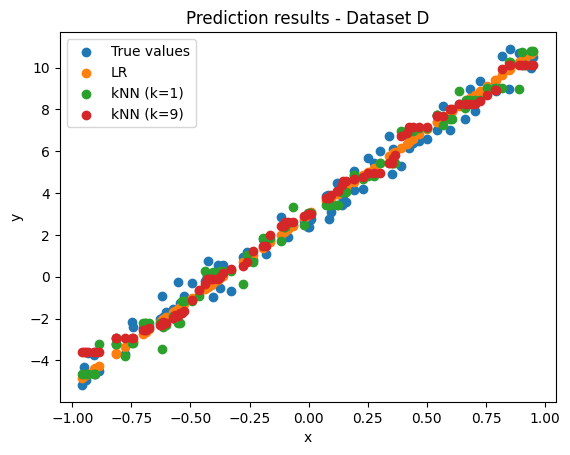

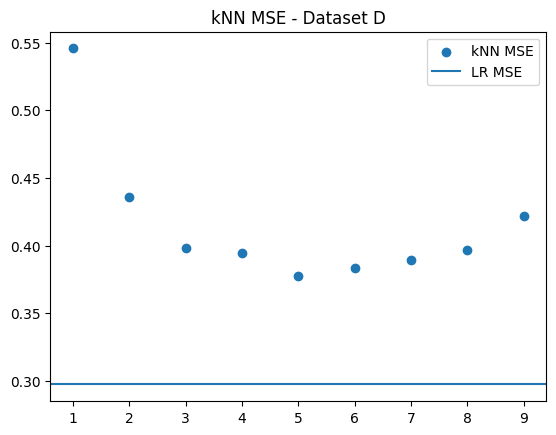

--- Dataset E ---
Linear Regression MSE: 0.0368
kNN (k=1) MSE: 0.0096
kNN (k=2) MSE: 0.0066
kNN (k=3) MSE: 0.0062
kNN (k=4) MSE: 0.0062
kNN (k=5) MSE: 0.0061
kNN (k=6) MSE: 0.0070
kNN (k=7) MSE: 0.0074
kNN (k=8) MSE: 0.0076
kNN (k=9) MSE: 0.0082


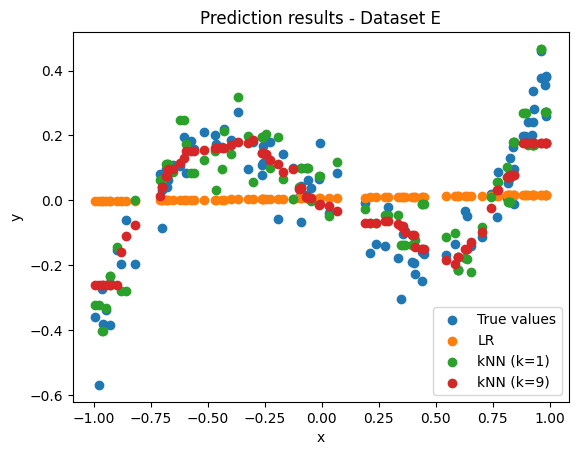

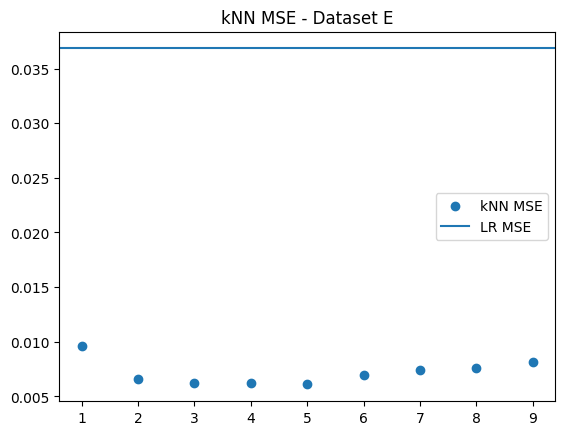

<Figure size 640x480 with 0 Axes>

In [23]:
def load_csv(path):
    # Use numpy.loadtxt; CSVs are numeric, comma-separated.
    return np.loadtxt(path, delimiter=",", dtype=float)


# Define datasets
datasets = [
    (
        "D",
        "a1-files/X_train_D.csv",
        "a1-files/Y_train_D.csv",
        "a1-files/X_test_D.csv",
        "a1-files/Y_test_D.csv",
    ),
    (
        "E",
        "a1-files/X_train_E.csv",
        "a1-files/Y_train_E.csv",
        "a1-files/X_test_E.csv",
        "a1-files/Y_test_E.csv",
    ),
]


def linear_regression(X, Y):
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    n = X.shape[0]

    A = np.hstack([X, np.ones((n, 1))])

    sol = np.linalg.solve(A.T @ A, A.T @ Y).ravel()
    w, b = sol[:-1], sol[-1]

    def predictor(x_new):
        return float(x_new * w + b)

    return predictor


def mse(y, y_pred):
    return np.sum((y - y_pred) ** 2) / (y.shape[0])


for name, x_train_path, y_train_path, x_test_path, y_test_path in datasets:
    # Load dataset
    x_train = load_csv(x_train_path)
    y_train = load_csv(y_train_path)
    x_test = load_csv(x_test_path)
    y_test = load_csv(y_test_path)

    print(f"--- Dataset {name} ---")

    # unregularized linear regression
    lr_predictor = linear_regression(x_train, y_train)
    y_lr_pred = np.array([lr_predictor(x) for x in x_test])
    lr_mse = mse(y_test, y_lr_pred)

    print(f"Linear Regression MSE: {lr_mse:.4f}")

    # knn regressions
    knn_result = []
    for k in range(1, 10):
        knn_predictor = knn_regression(x_train, y_train, k=k)
        y_knn_pred = np.array([knn_predictor(x) for x in x_test])
        knn_mse = mse(y_test, y_knn_pred)

        knn_result.append((y_knn_pred, knn_mse))

        print(f"kNN (k={k}) MSE: {knn_mse:.4f}")

    plt.scatter(x_test, y_test, label="True values")
    plt.scatter(x_test, y_lr_pred, label=f"LR")

    for k in [0, 8]:
        plt.scatter(
            x_test,
            knn_result[k][0],
            label=f"kNN (k={k + 1})",
        )

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Prediction results - Dataset {name}")
    plt.savefig(f"q4_2_{name}.svg")
    plt.show()
    plt.clf()

    plt.scatter(range(1, 10), [mse for _, mse in knn_result], label="kNN MSE")
    plt.axhline(lr_mse, label="LR MSE")
    plt.legend()
    plt.title(f"kNN MSE - Dataset {name}")
    plt.show()

    plt.clf()

--- Dataset F ---
x_train shape: (100, 20)
y_train shape: (100,)
Linear Regression MSE: 9.5972
kNN (k=1) MSE: 12.5728
kNN (k=2) MSE: 9.4374
kNN (k=3) MSE: 9.6338
kNN (k=4) MSE: 8.5383
kNN (k=5) MSE: 8.1903
kNN (k=6) MSE: 7.9938
kNN (k=7) MSE: 7.6131
kNN (k=8) MSE: 7.6172
kNN (k=9) MSE: 7.6837


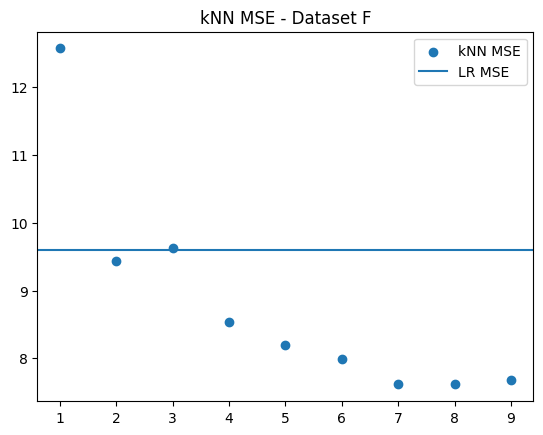

<Figure size 640x480 with 0 Axes>

In [24]:
def load_csv(path):
    return np.loadtxt(path, delimiter=",", dtype=float)


# Define datasets
datasets = [
    (
        "F",
        "a1-files/X_train_F.csv",
        "a1-files/Y_train_F.csv",
        "a1-files/X_test_F.csv",
        "a1-files/Y_test_F.csv",
    ),
]


def linear_regression(X, Y):
    n = X.shape[0]

    A = np.hstack([X, np.ones((n, 1))])

    sol = np.linalg.solve(A.T @ A, A.T @ Y).ravel()
    w, b = sol[:-1], sol[-1]

    def predictor(x_new):
        result = np.dot(x_new, w) + b
        return float(result)

    return predictor


def mse(y, y_pred):
    return np.sum((y - y_pred) ** 2) / (y.shape[0])


for name, x_train_path, y_train_path, x_test_path, y_test_path in datasets:
    # Load dataset
    x_train = load_csv(x_train_path)
    y_train = load_csv(y_train_path)
    x_test = load_csv(x_test_path)
    y_test = load_csv(y_test_path)

    print(f"--- Dataset {name} ---")
    print(f"x_train shape: {x_train.shape}")
    print(f"y_train shape: {y_train.shape}")

    # unregularized linear regression
    lr_predictor = linear_regression(x_train, y_train)
    y_lr_pred = np.array([lr_predictor(x) for x in x_test])
    lr_mse = mse(y_test, y_lr_pred)

    print(f"Linear Regression MSE: {lr_mse:.4f}")

    # knn regressions
    knn_result = []
    for k in range(1, 10):
        knn_predictor = knn_regression(x_train, y_train, k=k)
        y_knn_pred = np.array([knn_predictor(x) for x in x_test])
        knn_mse = mse(y_test, y_knn_pred)

        knn_result.append((y_knn_pred, knn_mse))

        print(f"kNN (k={k}) MSE: {knn_mse:.4f}")

    plt.scatter(range(1, 10), [mse for _, mse in knn_result], label="kNN MSE")
    plt.axhline(lr_mse, label="LR MSE")
    plt.legend()
    plt.title(f"kNN MSE - Dataset {name}")
    plt.savefig(f"q4_3_{name}.svg")
    plt.show()
    plt.clf()